In [1]:
import cv2
import numpy as np

from moviepy.editor import VideoFileClip
from scipy.misc import imresize


from matplotlib import pyplot
from matplotlib.pyplot import imshow, figure 

import IPython.display as display
from PIL import Image
import imagehash

%matplotlib inline
pyplot.rcParams['figure.figsize'] = [24, 16]

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
def isActive(frame):
    #snip = frame[924:940, 880:890]
#     snip = frame[934:940, 880:890]
    snip = frame[460:675, 660:675]

    return np.count_nonzero(snip) > 10

def overlayText(image, text, location, size=3, weight=8, color=(255,255,255)):
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(image, text, location, font, size, color, weight)
    return image

def markIsActive(frame):
    active = "True" if isActive(frame) else "False"
    text = "Is Active? " + active
    return overlayText(frame, text, (20, 20), 1)

In [3]:
enemies = {}
sprites = {}

In [4]:
def saveBlobs(frame):
    frame = imresize(frame, size=(720, 1280), interp='nearest')
    cv2.rectangle(frame, (460, 643), (660, 675), (255, 255, 255), 2)

    active = isActive(frame)
    text = "Is Active? " + "True" if active else "False"

    overlayText(frame, text, (20, 20), 1, 2)    
    if not active:
        return frame
    crop = frame[115:608, 309:975]
    gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
    ret,thresh = cv2.threshold(gray,10,255,0)
    blur = cv2.GaussianBlur(thresh, (3, 3), 0)
    contours, hierarchy = cv2.findContours(blur, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    for contour in enumerate(contours):       
        (x,y,w,h) = cv2.boundingRect(contour[1])
        if h < 25 or w < 10:
            continue
        snip = thresh[y:y+h, x:x+w]
        hash = str(imagehash.average_hash(Image.fromarray(snip)))
        if not hash in enemies:
            enemies[hash] = 1
#             if enemies[hash] > 100:
            x += 309
            y += 115
            cv2.rectangle(frame, (x,y), (x+w,y+h), (255, 255, 255), 2)
            sprite = Image.fromarray(frame[y:y+h, x:x+w])
            sprites[hash] = sprite
#                 sprite.save("/home/strider/Code/robotron/resources/images/enemies/{}.jpg".format(hash))
#         else:
#             enemies[hash] = 1
            
    return frame

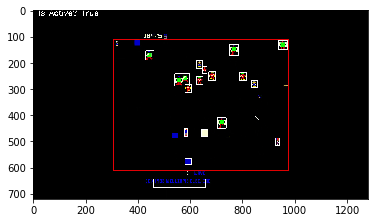

In [5]:
clip = VideoFileClip('/home/strider/Code/robotron/resources/video/robotron-1.mp4')
#subclip = clip.subclip(5, 10)
#tagged = clip.fl_image(saveBlobs)
# tagged.ipython_display(width=400, audio=False)
#tagged.write_videofile("blah.mp4")
img = clip.get_frame(101.6)
tagged = saveBlobs(img)
imshow(tagged)

dict_keys(['007e7e7e7e7e7e00', '7cfe7e183c3c1838', '007e7e7e7e7e7f00', '3e3e3e3e3e7e7e00', '1818ffffff341030', '183c7eff9c3c3e30', '083c7c1c7ebe3c7e', '3c3c38ffbe182c2c', '04062efefefa7001', '183c387f3f382466', '1c3c7eff193c2c0c', '383c18fefe3c2c00', '081c3e3c7e3c3c7e', '10107c7c7e7c6c46', '1818ffffff1c1030', '1810fffffffd2824'])


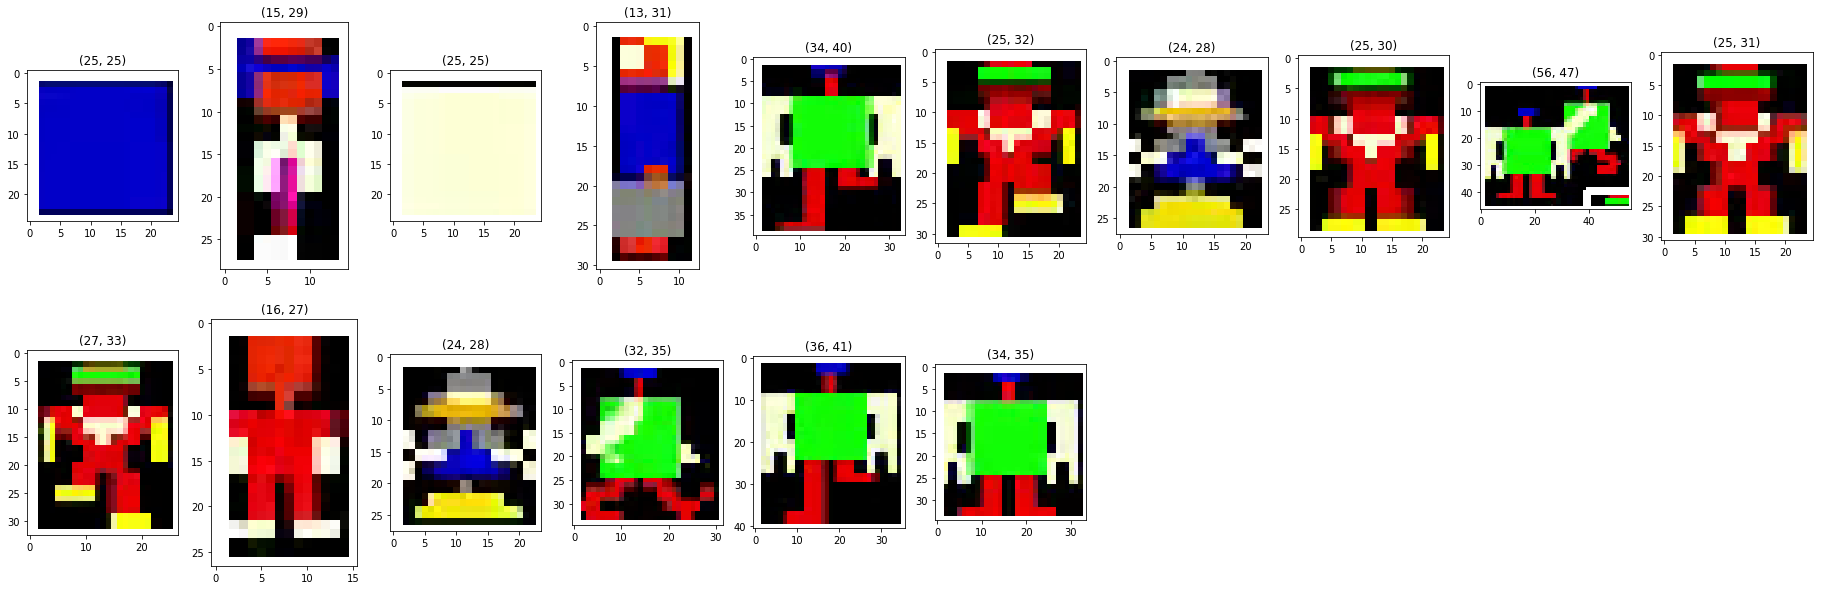

In [37]:
fig=pyplot.figure(figsize=(32, 10))
i = 0
r = 10
c = int(len(sprites) / 10) + 1
print(enemies.keys())
for enemy, count in enemies.items():
    i += 1
    subplot = fig.add_subplot(c, r, i)
    img = sprites[enemy]
    imshow(img)
    subplot.set_title("{}".format(img.size))



In [7]:
# f = open("enemies.txt", "w")
# for enemy, count in enemies.items():
#     img = sprites[enemy]
#     imshow(img)   
#         width, height = im.shape
#         f.write("{}: {}  ({}, {})".format(enemy, count, width, height))
#        img.save(enemy+".jpg")


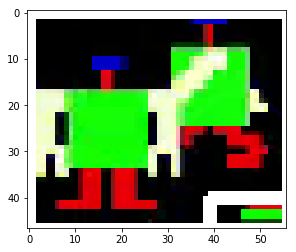

In [14]:
double = sprites["04062efefefa7001"]
imshow(double)

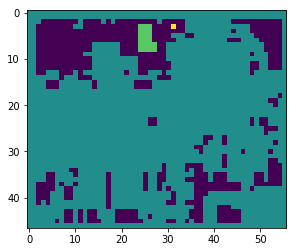

In [31]:
img = cv2.cvtColor(np.array(double), cv2.COLOR_BGR2GRAY)
ret, labels = cv2.connectedComponents(img, connectivity=4)
colors = np.linspace(100, 255, ret)
mask = np.array(labels, dtype=np.uint8)
for label in range(1,ret):
    mask[labels == label] = colors[label - 1]
imshow(mask)